In [1]:
#importing cell

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.integrate import odeint

### 1. Feedback loops 

In [2]:
def negative_feedback(R, t, l, gamma, k, h, tau):
    dR = l + gamma/(1+(R/k)**h) - R/tau
    return dR

def positive_feedback(y, t, gamma_1, gamma_2, h_1, h_2, tau_R, tau_L):
    R=y[0]
    L=y[1]

    dR = l_1 + gamma_1/(1 + L**h_1) - R/tau_R
    dL = l_2 + gamma_2/(1 + R**h_2) - L/tau_L

    return np.array([dR, dL])

def combining_loops(y, t, l, gamma, k, h, tau, tau_T, tau_E, sigma):
    R=y[0]
    T=y[1]
    E=y[2]
    S=y[3]

    dR = l + gamma/(1+(R/k)**h) - R/tau
    dT = l + gamma/(1+(R/k)**h) - T/tau_T
    dE = l + gamma/(1+(R/k)**h) - E/tau_E
    dS = sigma * (T/(1+T)) - gamma * (E/(1+E))

    return np.array([dR, dT, dE, dS])

#### 1.1. Negative feedback

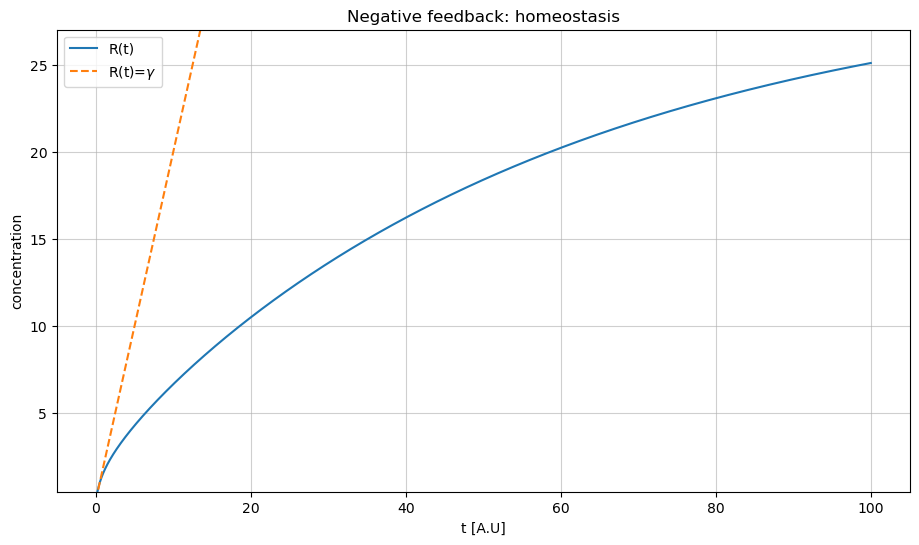

In [3]:
l = 0.5
gamma = 2
k = 1
h = 2
tau = 60

time_period=100
time_step=0.001
t=np.linspace(0,time_period,int(time_period/time_step))

R0 = 0

R = odeint(negative_feedback, R0, t, args=(l, gamma, k, h, tau))

fig, ax = plt.subplots(figsize=(11,6))
ax.set(title="Negative feedback: homeostasis", xlabel= "t [A.U]", ylabel="concentration")
ax.set_ylim(0.5,27)
ax.plot(t,R,label="R(t)")
ax.plot(t[:18000],gamma*t[:18000],label=("R(t)=$\gamma$"),ls="dashed")
ax.legend()
ax.grid(alpha=0.6)

#### 1.2. Positive Feedback

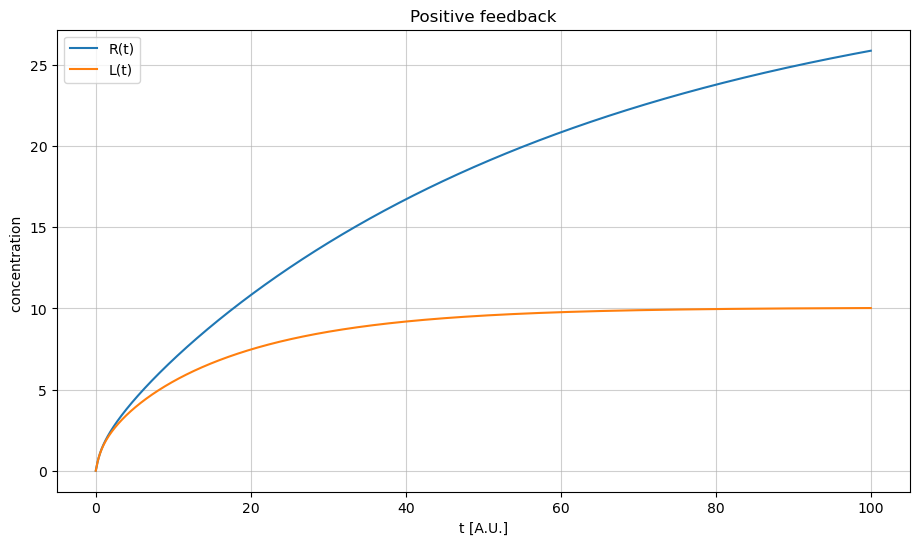

In [4]:
l_1, l_2 = 0.5, 0.5
gamma_1, gamma_2 = 2, 2
h_1, h_2 = 2, 2
tau_R, tau_L = 60, 20

time_period=100
time_step=0.001
t=np.linspace(0,time_period,int(time_period/time_step))

R0 = 0
L0 = 0

y0 = np.array([R0,L0])

y = odeint(positive_feedback, y0, t, args=(gamma_1, gamma_2, h_1, h_2, tau_R, tau_L))
R = y[:,0]
L = y[:,1]


fig, ax = plt.subplots(figsize=(11,6))
ax.set(title="Positive feedback", xlabel= "t [A.U.]", ylabel="concentration ")
ax.plot(t,R,label="R(t)")
ax.plot(t,L,label="L(t)")
ax.legend()
ax.grid(alpha=0.6)

#### 1.3. Combining Loops

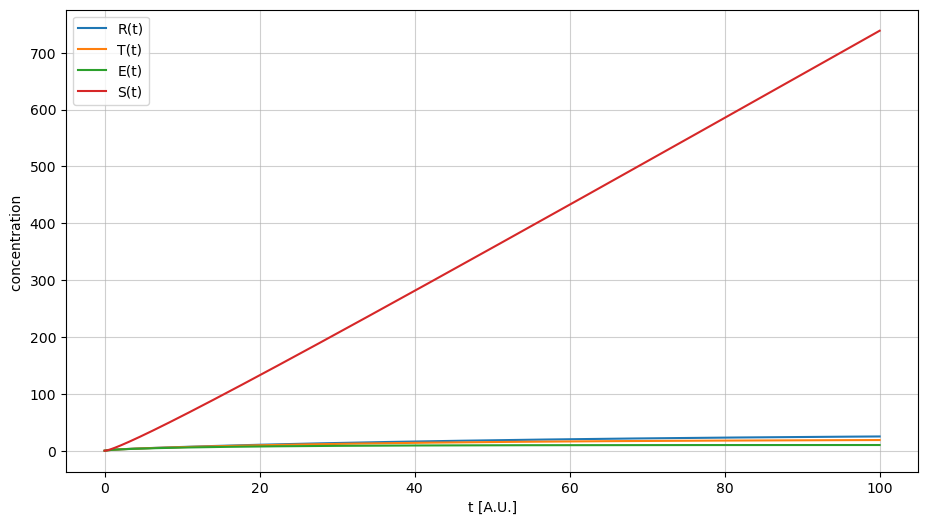

In [5]:
l = 0.5
gamma = 2
sigma = 10
k = 1
h = 2
tau = 60
tau_T = 40
tau_E = 20

time_period=100
time_step=0.001
t=np.linspace(0,time_period,int(time_period/time_step))

R0 = 0
T0 = 0
E0 = 0
S0 = 0

y0 = np.array([R0, T0, E0, S0])

y = odeint(combining_loops, y0, t, args=(l, gamma, k, h, tau, tau_T, tau_E, sigma))
R = y[:,0]
T = y[:,1]
E = y[:,2]
S = y[:,3]

fig, ax = plt.subplots(figsize=(11,6))
ax.set(title="", xlabel= "t [A.U.]", ylabel="concentration ")
ax.plot(t,R,label="R(t)")
ax.plot(t,T,label="T(t)")
ax.plot(t,E,label="E(t)")
ax.plot(t,S,label="S(t)")
ax.legend()
ax.grid(alpha=0.6)